In [1]:
from datasets import load_dataset
import regex
from mlcroissant import Dataset
import pandas as pd

In [5]:
dataset = pd.read_parquet("0000.parquet")

In [7]:
dataset

,_id,title,text
0,3,,"Nie mówię, że nie podoba mi się też pomysł szk..."
1,31,,Tak więc nic nie zapobiega fałszywym ocenom po...
2,56,,Nigdy nie możesz korzystać z FSA dla indywidua...
3,59,,Samsung stworzył LCD i inne technologie płaski...
4,63,,Oto wymagania SEC: Federalne przepisy dotycząc...
...,...,...,...
57633,599946,,">Cóż, po pierwsze, drogi to coś więcej niż hob..."
57634,599953,,"Tak, robią. Na dotacje dla firm farmaceutyczny..."
57635,599966,,">To bardzo smutne, że nie rozumiesz ludzkiej n..."
57636,599975,,„Czy Twój CTO pozwolił dużej grupie użyć „„adm...


In [23]:
import re
from datasets import load_dataset
from collections import Counter

# Regular expressions
time_regex = re.compile(r'\b([01]?[0-9]|2[0-3]):[0-5][0-9]\b')
# CORRECTED: Using a non-capturing group (?:...)
date_regex = re.compile(r'\b\d{1,2}\s+(?:stycznia|lutego|marca|kwietnia|maja|czerwca|lipca|sierpnia|września|października|listopada|grudnia)\b', re.IGNORECASE)

# Find all occurrences
times = []
dates = []
for example in dataset["text"]:
    times.extend(time_regex.findall(example))
    dates.extend(date_regex.findall(example)) # Now dates will be ['20 września', '5 stycznia', ...]

# Extract hours and months
hours = [int(time.split(':')[0]) for time in times]
# This line will now work correctly!
months = [date.split(' ')[1].lower() for date in dates]

# Count occurrences
hour_counts = Counter(hours)
month_counts = Counter(months)

print("Hour Counts:")
print(hour_counts)
print("\nMonth Counts:")
print(month_counts)

Hour Counts:
Counter({0: 41, 17: 34, 1: 28, 9: 27, 15: 26, 16: 26, 4: 22, 22: 19, 19: 19, 20: 18, 13: 17, 8: 16, 14: 16, 18: 16, 11: 16, 2: 16, 6: 15, 12: 14, 5: 14, 23: 14, 3: 13, 10: 8, 21: 7, 7: 7})

Month Counts:
Counter({'stycznia': 215, 'kwietnia': 201, 'grudnia': 181, 'września': 123, 'marca': 112, 'sierpnia': 111, 'lipca': 106, 'października': 102, 'czerwca': 101, 'maja': 83, 'lutego': 82, 'listopada': 56})


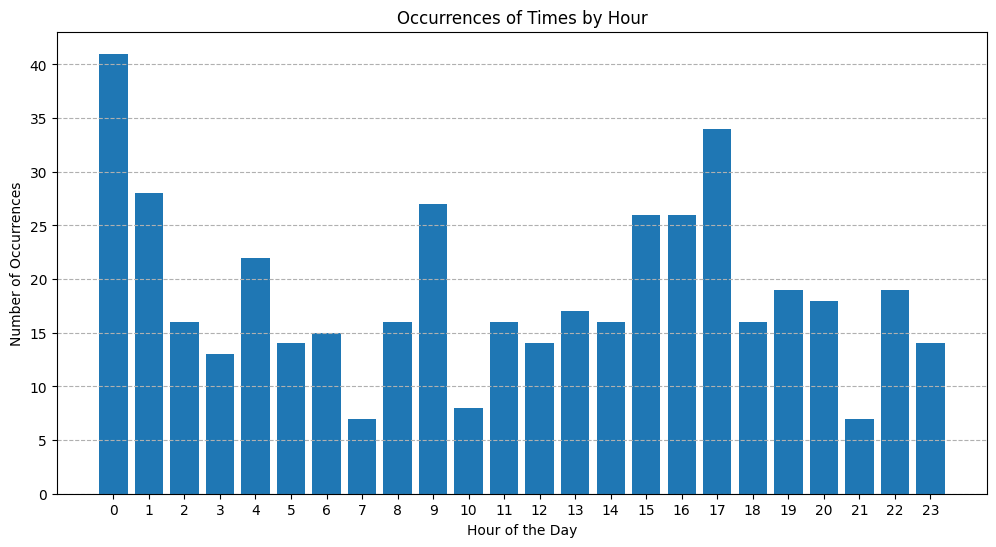

In [25]:
import matplotlib.pyplot as plt

# Sort hours for plotting
sorted_hours = sorted(hour_counts.items())
hour_labels, hour_values = zip(*sorted_hours)

plt.figure(figsize=(12, 6))
plt.bar(hour_labels, hour_values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Times by Hour')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--')
plt.show()

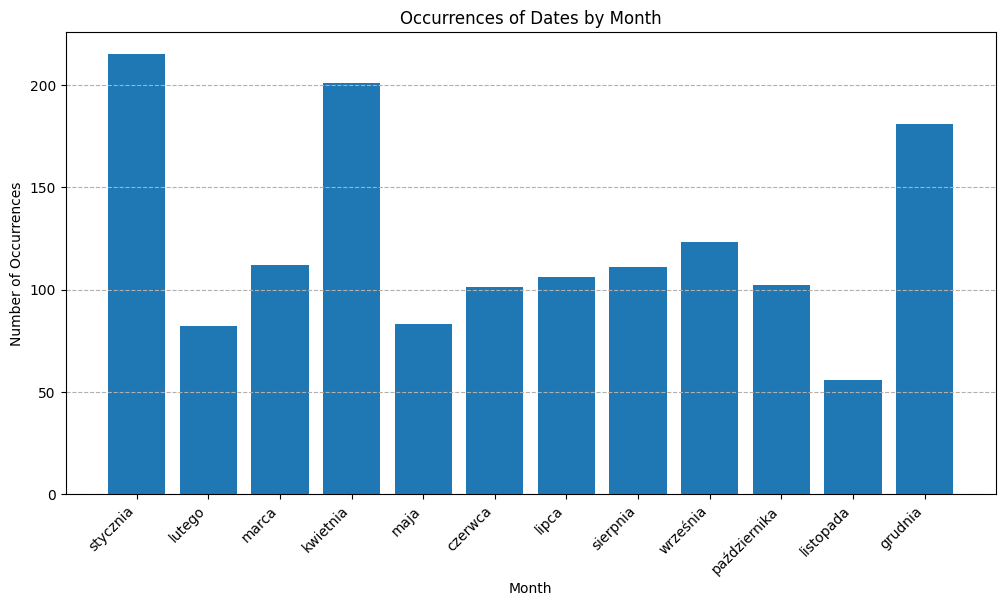

In [27]:
# Order of Polish months
polish_months_ordered = ['stycznia', 'lutego', 'marca', 'kwietnia', 'maja', 'czerwca', 'lipca', 'sierpnia', 'września', 'października', 'listopada', 'grudnia']
month_labels = [month for month in polish_months_ordered if month in month_counts]
month_values = [month_counts[month] for month in month_labels]

plt.figure(figsize=(12, 6))
plt.bar(month_labels, month_values)
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Dates by Month')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

In [29]:
kwiecien_regex = re.compile(r'\bkwie(t|ci)(eń|nia|niowi|niem|niu)\b', re.IGNORECASE)
kwiecien_count = 0
for example in dataset["text"]:
    kwiecien_count += len(kwiecien_regex.findall(example))

print(f"Total occurrences of 'kwiecień' (any form): {kwiecien_count}")

Total occurrences of 'kwiecień' (any form): 353


In [30]:
kwiecien_with_number_regex = re.compile(r'\b\d+\s+kwie(t|ci)(eń|nia|niowi|niem|niu)\b', re.IGNORECASE)
kwiecien_with_number_count = 0
for example in dataset["text"]:
    kwiecien_with_number_count += len(kwiecien_with_number_regex.findall(example))

print(f"Occurrences of 'kwiecień' preceded by a number: {kwiecien_with_number_count}")

Occurrences of 'kwiecień' preceded by a number: 201


In [31]:
kwiecien_without_number_regex = re.compile(r'(?<!\d\s)\bkwie(t|ci)(eń|nia|niowi|niem|niu)\b', re.IGNORECASE)
kwiecien_without_number_count = 0
for example in dataset["text"]:
    kwiecien_without_number_count += len(kwiecien_without_number_regex.findall(example))

print(f"Occurrences of 'kwiecień' not preceded by a number: {kwiecien_without_number_count}")

# Check if the counts add up
total_from_parts = kwiecien_with_number_count + kwiecien_without_number_count
print(f"Sum of parts: {total_from_parts}")
print(f"Total from task 4: {kwiecien_count}")
print(f"Do they sum up? {'Yes' if total_from_parts == kwiecien_count else 'No'}")

Occurrences of 'kwiecień' not preceded by a number: 152
Sum of parts: 353
Total from task 4: 353
Do they sum up? Yes
